In [213]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing as pre
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from six import StringIO
import pydot
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.impute import KNNImputer
from six import StringIO
from sklearn import tree
import pydot

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


Adding the data

In [214]:
train_Data = pd.read_csv('../input/titanic/train.csv')
test_Data = pd.read_csv('../input/titanic/test.csv')
combine = [train_Data, test_Data]

train_Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [215]:
train_Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [216]:
train_Data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Drop features we dont want to use

In [217]:
train_Data = train_Data.drop(['Name','Ticket','Cabin','PassengerId'], axis=1)
test_Data = test_Data.drop(['Name','Ticket','Cabin'], axis=1)
combine = [train_Data, test_Data]

In [218]:
train_Data['Sex'] = train_Data['Sex'].map({'male':0, 'female':1}).astype(int)
test_Data['Sex'] = test_Data['Sex'].map({'male':0, 'female':1}).astype(int)
combine = [train_Data, test_Data]

train_Data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [219]:
train_Data.Embarked.mode()

0    S
dtype: object

In [220]:
train_Data['Embarked'] = train_Data['Embarked'].fillna('S')
test_Data['Embarked'] = test_Data['Embarked'].fillna('S')


train_Data['Embarked'] = train_Data['Embarked'].map({'C':0, 'Q':1, 'S':2}).astype(int)
test_Data['Embarked'] = test_Data['Embarked'].map({'C':0, 'Q':1, 'S':2}).astype(int)
combine = [train_Data, test_Data]

train_Data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2


In [221]:
train_Data['famSize'] = train_Data['SibSp'] + train_Data['Parch'] + 1
test_Data['famSize'] = test_Data['SibSp'] + test_Data['Parch'] + 1

train_Data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,famSize
0,0,3,0,22.0,1,0,7.2500,2,2
1,1,1,1,38.0,1,0,71.2833,0,2
2,1,3,1,26.0,0,0,7.9250,2,1
3,1,1,1,35.0,1,0,53.1000,2,2
4,0,3,0,35.0,0,0,8.0500,2,1


Using a KNNImputer to fill missing values of age from Fare and Sibsp features

In [222]:
knn_imputer = KNNImputer()

imp_Train_Data = knn_imputer.fit_transform(train_Data[['Fare','SibSp','Age']])
imp_Test_Data = knn_imputer.fit_transform(test_Data[['Fare','SibSp','Age']])

train_Data['Age'] = imp_Train_Data[:,2]
test_Data['Age'] = imp_Test_Data[:,2]

Normalizing the Fare feature

In [223]:
test_Data['Fare'].fillna(value=test_Data.Fare.mean(),inplace=True)
train_Data['Fare'] = train_Data['Fare']/train_Data['Fare'].abs().max()
test_Data['Fare'] = test_Data['Fare']/test_Data['Fare'].abs().max()
train_Data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,famSize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,30.122678,0.523008,0.381594,0.062858,1.536476,1.904602
std,0.486592,0.836071,0.477990,13.410387,1.102743,0.806057,0.096995,0.791503,1.613459
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,0.015440,1.000000,1.000000
50%,0.000000,3.000000,0.000000,29.000000,0.000000,0.000000,0.028213,2.000000,1.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,0.060508,2.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,1.000000,2.000000,11.000000


In [224]:
test_Data['Age'].fillna(value=test_Data.Age.mean(),inplace=True)
train_Data['Age'] = train_Data['Age']/train_Data['Age'].abs().max()
test_Data['Age'] = test_Data['Age']/test_Data['Age'].abs().max()
train_Data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,famSize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,0.376533,0.523008,0.381594,0.062858,1.536476,1.904602
std,0.486592,0.836071,0.477990,0.167630,1.102743,0.806057,0.096995,0.791503,1.613459
min,0.000000,1.000000,0.000000,0.005250,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,0.275000,0.000000,0.000000,0.015440,1.000000,1.000000
50%,0.000000,3.000000,0.000000,0.362500,0.000000,0.000000,0.028213,2.000000,1.000000
75%,1.000000,3.000000,1.000000,0.475000,1.000000,0.000000,0.060508,2.000000,2.000000
max,1.000000,3.000000,1.000000,1.000000,8.000000,6.000000,1.000000,2.000000,11.000000


In [225]:
train_Data[['famSize', 'Survived']].groupby(['famSize'], as_index=False).mean().sort_values(by='famSize', ascending=False)

,famSize,Survived
8,11,0.000000
7,8,0.000000
6,7,0.333333
5,6,0.136364
4,5,0.200000
3,4,0.724138
2,3,0.578431
1,2,0.552795
0,1,0.303538


In [226]:
combine = [train_Data,test_Data]
for dataset in combine:
    dataset.loc[ dataset['famSize'] <= 1, 'famSize'] = 0
    dataset.loc[(dataset['famSize'] > 1) & (dataset['famSize'] <= 4), 'famSize'] = 1
    dataset.loc[(dataset['famSize'] > 4), 'famSize']   = 2
    dataset['famSize'] = dataset['famSize'].astype(int)

combine_Data = [train_Data, test_Data]

train_Data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,famSize
0,0,3,0,0.2750,1,0,0.014151,2,1
1,1,1,1,0.4750,1,0,0.139136,0,1
2,1,3,1,0.3250,0,0,0.015469,2,0
3,1,1,1,0.4375,1,0,0.103644,2,1
4,0,3,0,0.4375,0,0,0.015713,2,0


In [227]:
X_train_Data = train_Data.drop("Survived", axis=1)
Y_train_Data = train_Data["Survived"]
X_test_Data  = test_Data.drop("PassengerId", axis=1).copy()
X_train_Data.shape, Y_train_Data.shape, X_test_Data.shape

((891, 8), (891,), (418, 8))

In [228]:
DTclassifier=DecisionTreeClassifier() # running decision tree classifier 
DTclassifier.fit(X_train_Data,Y_train_Data)

DecisionTreeClassifier()

In [229]:
dot_data = StringIO()
tree.export_graphviz(DTclassifier, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
print(graph[0])

digraph Tree {
node [fontname="helvetica", shape=box];
edge [fontname="helvetica"];
0 [label="X[1] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]"];
1 [label="X[2] <= 0.081\ngini = 0.306\nsamples = 577\nvalue = [468, 109]"];
0 -> 1  [headlabel="True", labelangle=45, labeldistance="2.5"];
2 [label="X[7] <= 1.5\ngini = 0.444\nsamples = 24\nvalue = [8, 16]"];
1 -> 2;
3 [label="gini = 0.0\nsamples = 15\nvalue = [0, 15]"];
2 -> 3;
4 [label="X[5] <= 0.061\ngini = 0.198\nsamples = 9\nvalue = [8, 1]"];
2 -> 4;
5 [label="gini = 0.0\nsamples = 5\nvalue = [5, 0]"];
4 -> 5;
6 [label="X[5] <= 0.069\ngini = 0.375\nsamples = 4\nvalue = [3, 1]"];
4 -> 6;
7 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"];
6 -> 7;
8 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"];
6 -> 8;
9 [label="X[0] <= 1.5\ngini = 0.28\nsamples = 553\nvalue = [460, 93]"];
1 -> 9;
10 [label="X[5] <= 0.051\ngini = 0.46\nsamples = 120\nvalue = [77, 43]"];
9 -> 10;
11 [label="gini = 0.0\nsamples = 10\nvalue = [10, 0]"];
10 

In [230]:
x=train_Data.iloc[:,1:8].values  # predictors 
y=train_Data.iloc[:,0].values  #outcome

In [231]:
oh = pre.OneHotEncoder() #one hot encoding 
a=oh.fit_transform(x[:,6:7]).toarray()
x=np.delete(x,6,axis=1)
x=np.concatenate((a,x),axis=1)

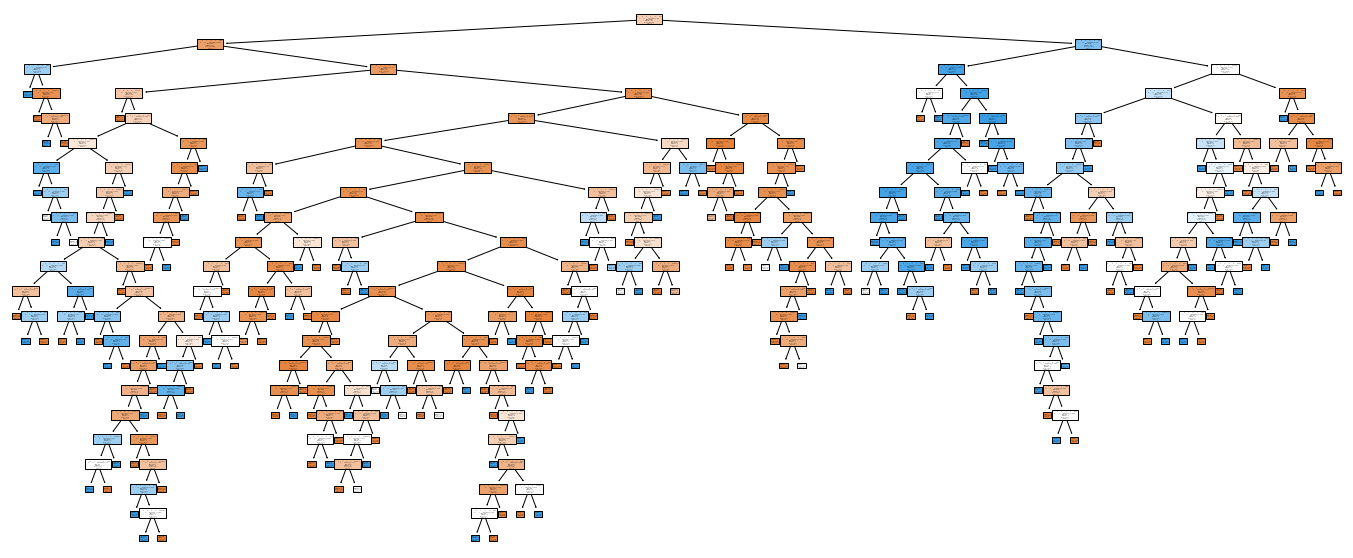

In [232]:
Target = ['0','1']
fig = plt.figure(figsize=(24,10))
_ = tree.plot_tree(DTclassifier, feature_names= x, class_names= Target, filled=True)

In [233]:
Decision_Tree_scores = cross_val_score(DTclassifier, x,y, cv=5, scoring = "accuracy")
print("Scores for Decision Trees:", Decision_Tree_scores)
print("Average Scores obtained for all the Decision Trees:", Decision_Tree_scores.mean())

Scores for Decision Trees: [0.74860335 0.79213483 0.81460674 0.75280899 0.79213483]
Average Scores obtained for all the Decision Trees: 0.7800577490427468


In [234]:
RFclassifier=RandomForestClassifier(n_estimators=100,random_state=0)
RFclassifier.fit(X_train_Data,Y_train_Data)

RandomForestClassifier(random_state=0)

In [235]:
RFpredictor=RFclassifier.predict(X_test_Data)
RFpredictor

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [236]:
Random_Forest_scores = cross_val_score(RFclassifier, x,y, cv=5, scoring = "accuracy")
print("Scores for Random Forest: ", Random_Forest_scores)
print("Average Scores obtained for Random Forest: ", Random_Forest_scores.mean())

Scores for Random Forest:  [0.78212291 0.80337079 0.85393258 0.79775281 0.84269663]
Average Scores obtained for Random Forest:  0.8159751428033394


In [237]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train_Data, Y_train_Data)
Y_prediction = svc.predict(X_test_Data)
SVM = round(svc.score(X_train_Data, Y_train_Data) * 100, 2)
SVM


80.92

This cell finds the best number of neighbors to use for our model

In [238]:
Hyperparameters = {"n_neighbors": range(1, 50)}
grid_Search = GridSearchCV(KNeighborsClassifier(), Hyperparameters)
grid_Search.fit(X_train_Data, Y_train_Data)

grid_Search.best_params_

{'n_neighbors': 14}

In [239]:
kNN = KNeighborsClassifier(n_neighbors = 14)
kNN.fit(X_train_Data, Y_train_Data)
Y_prediction = kNN.predict(X_test_Data)
KNN = round(kNN.score(X_train_Data, Y_train_Data) * 100, 2)
kNN.score(X_train_Data, Y_train_Data)

0.8170594837261503

In [240]:
# Decision Tree

decision_Tree = DecisionTreeClassifier()
decision_Tree.fit(X_train_Data, Y_train_Data)
Y_prediction = decision_Tree.predict(X_test_Data)
Decision_Tree= round(decision_Tree.score(X_train_Data, Y_train_Data) * 100, 2)
Decision_Tree

98.2

In [241]:
#parameters = {"n_estimators":[1000,2500, 5000] ,"max_depth": [3,5,7,8,10], "min_samples_split": [5,8,10]}
#gridsearch = GridSearchCV(RandomForestClassifier(), parameters)
#gridsearch.fit(X_train, Y_train)

#gridsearch.best_params_
#{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 1000}

In [242]:
# Random Forest

RF = RandomForestClassifier(n_estimators=5000, min_samples_split = 10, max_depth=5)
RF.fit(X_train_Data, Y_train_Data)
Y_pred = RF.predict(X_test_Data)
RF.score(X_train_Data, Y_train_Data)
RANDOMFOREST = round(RF.score(X_train_Data, Y_train_Data) * 100, 2)
RANDOMFOREST

85.19

In [243]:
gbm = xgb.XGBClassifier(learning_rate = .15, max_depth=7,subsample = .7)
gbm.fit(X_train_Data, Y_train_Data)
gmbScore = round(gbm.score(X_train_Data, Y_train_Data) *100, 2)
gmbScore

94.84

In [244]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train_Data, Y_train_Data)
Y_pred = gaussian.predict(X_test_Data)
acc_gaussian = round(gaussian.score(X_train_Data, Y_train_Data) * 100, 2)
acc_gaussian

79.12

In [245]:
# test the accuracy of Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train_Data, Y_train_Data)
y_pred = sgd.predict(X_test_Data)
acc_sgd = round(sgd.score(X_train_Data, Y_train_Data) * 100, 2)
acc_sgd

75.08

In [246]:
# test the accuracy of Linear SVC


linear_svc = LinearSVC()
linear_svc.fit(X_train_Data, Y_train_Data)
y_pred = linear_svc.predict(X_test_Data)
acc_linear_svc = round(linear_svc.score(X_train_Data, Y_train_Data) * 100, 2)
acc_linear_svc

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


80.25

In [247]:
models = pd.DataFrame({
    'Model': [ 'KNN','Random Forest','Decision Tree', 'XGB' , 'GNB','SGD', 'Lin-SVC'],
    'Score': [KNN,RANDOMFOREST,Decision_Tree,gmbScore, acc_gaussian, acc_sgd, acc_linear_svc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Decision Tree,98.20
3,XGB,94.84
1,Random Forest,85.19
0,KNN,81.71
6,Lin-SVC,80.25
4,GNB,79.12
5,SGD,75.08


In [248]:
Y_prediction = RF.predict(X_test_Data)